# Demonstration/Test of Retrolabel Voting System

In [318]:
import os

In [319]:
def read_lines(file):
    '''read each line in the file into a list'''
    lines = []
    with open(file, 'r') as f:
        for line in f:
            lines.append(line.strip())
    return lines

In [320]:
def get_files(directory):
    '''get all files in the directory'''
    files = []
    for file in os.listdir(directory):
        if file.endswith('.txt'):
            files.append(file)
    return files

In [321]:
def flatten_list(l):
    '''flatten a list of lists'''
    return [item for sublist in l for item in sublist]

In [322]:
all_dets = []
for file in get_files('demo_data/labels'):
    all_dets.append(read_lines('demo_data/labels/' + file))

In [323]:
all_dets = flatten_list(all_dets)

In [324]:
len(all_dets)

5379

In [325]:
all_dets[0]

'681, 217, 0.0518229, 0.159028, 0.101562, 0.315278, 0.851074, 0'

In [326]:
'''sort the list by the first column (the frame number)'''
all_dets.sort(key=lambda x: float(x.split(',')[0]))

In [327]:
'''filter the list by the second column (the track id)'''
def filter_list(l, col, val):
    '''filter a list by a column'''
    return [x for x in l if x.split(',')[col] == val]

In [328]:
obj_551 = filter_list(all_dets, 1, ' 551')

In [329]:
obj_551 = obj_551[::2]

In [330]:
obj_frame = [x.split(',')[0] for x in obj_551]
obj_height = [x.split(',')[4] for x in obj_551]
obj_width = [x.split(',')[5] for x in obj_551]
obj_cls = [x.split(',')[7] for x in obj_551]

In [331]:
smallest_area = min(map(lambda x: float(x.split(',')[4]) * float(x.split(',')[5]), obj_551))
largest_area = max(map(lambda x: float(x.split(',')[4]) * float(x.split(',')[5]), obj_551))
mid_area = (smallest_area + largest_area) / 2

In [332]:
class_id_to_color = {
    0: 'tab:red',
    80: 'tab:green'
}

obj_color = [class_id_to_color[int(x.split(',')[7])] for x in obj_551]

In [333]:
obj_area = [float(x.split(',')[4]) * float(x.split(',')[5]) for x in obj_551]

In [334]:
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [8, 5]

plt.style.use('seaborn-white')

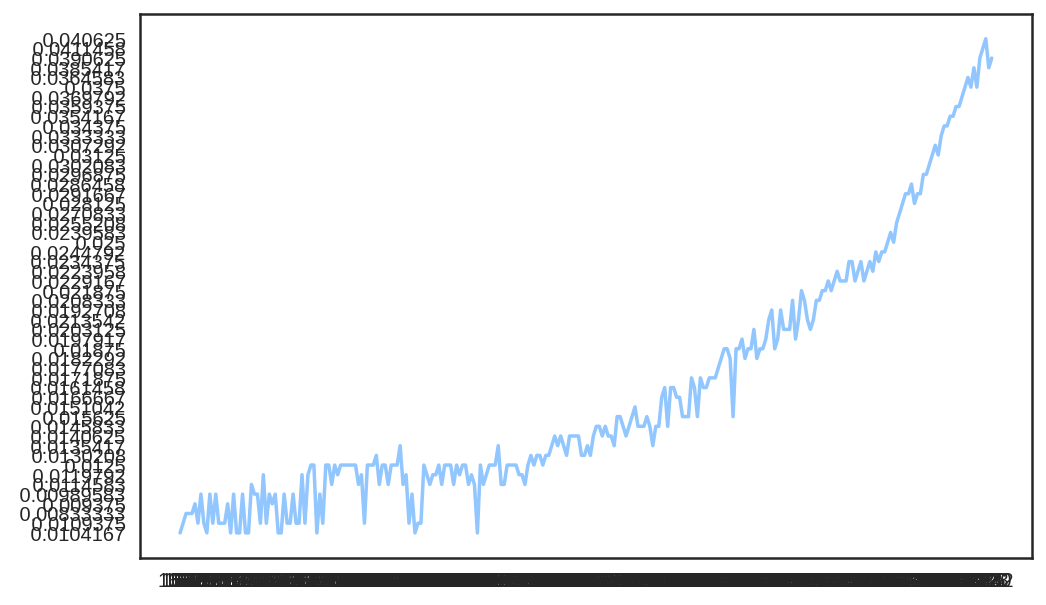

In [335]:
plt.plot(obj_frame, obj_height)

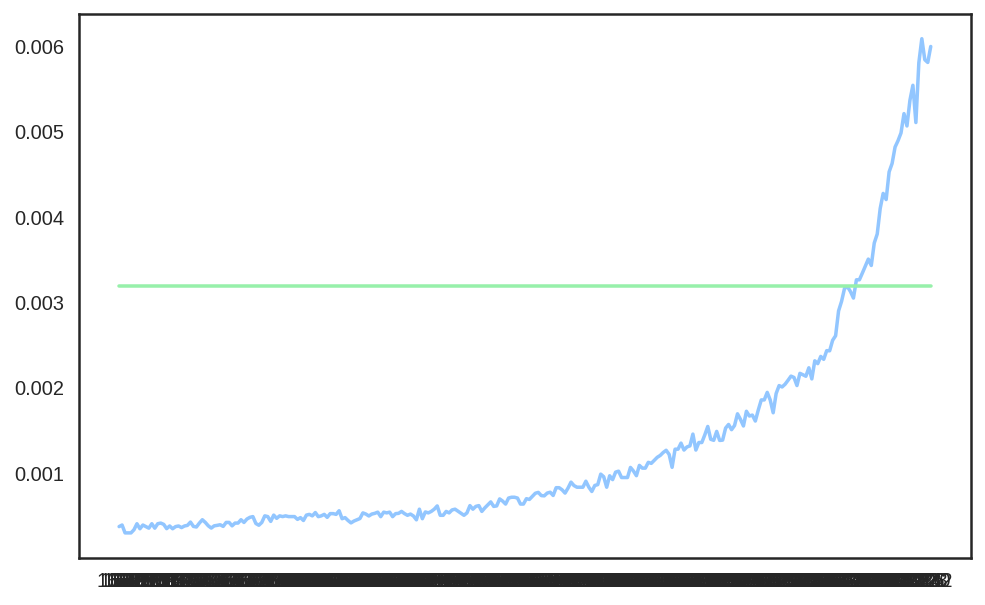

In [336]:
plt.plot(obj_frame, obj_area)
plt.plot(obj_frame, [mid_area] * len(obj_frame))

In [337]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


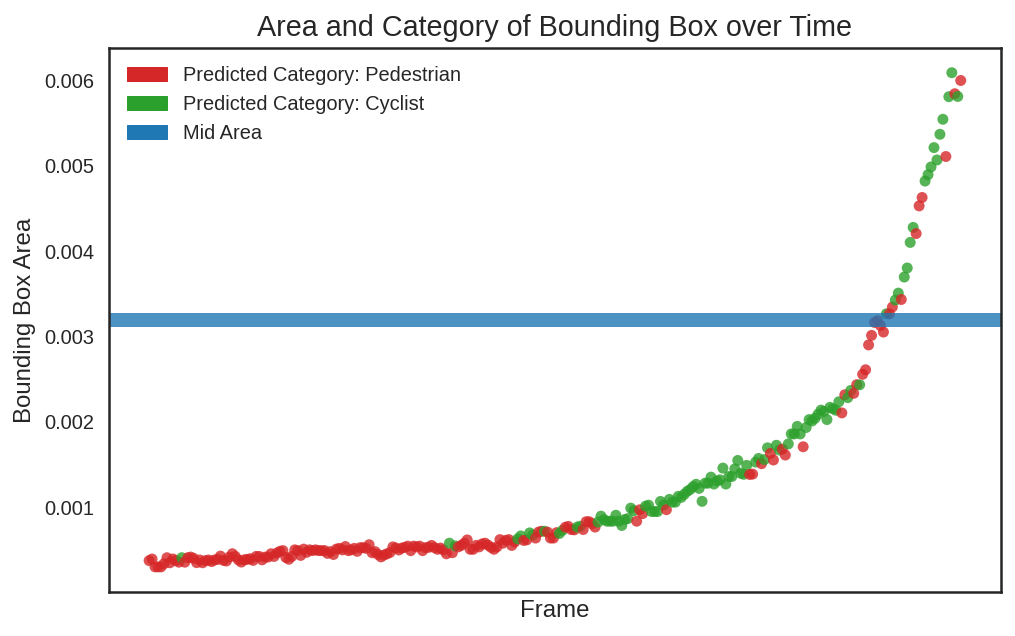

In [338]:
import matplotlib.patches as mpatches

fig,ax = plt.subplots()
ax.set_xlabel('Frame')
ax.set_xticks([])
ax.set_ylabel('Bounding Box Area')
ax.set_title('Area and Category of Bounding Box over Time')
# horizontal line representing the mid area
plt.axline((0, mid_area), (1, mid_area), linewidth=7, color='tab:blue', alpha=0.8)

# plot the area of each object with a color corresponding to the class
plt.scatter(obj_frame, obj_area, c=obj_color, cmap='viridis', alpha=0.8, linewidths=0, s=30)
plt.xticks(rotation=90)
red_patch = mpatches.Patch(color='tab:red', label='Predicted Category: Pedestrian')
green_patch = mpatches.Patch(color='tab:green', label='Predicted Category: Cyclist')
blue_patch = mpatches.Patch(color='tab:blue', label='Mid Area')
ax.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()